**Install any packages.**

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 1.9MB/s 
     |████████████████████████████████| 10.4MB 58.5MB/s 


# Questions:


*   Number of cases.
*   Which country has the highest cases.
*   Top countries affected.
*   Distribution per continent.
*   Cases per day.
*   Cases per day(Affected Country)



In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from shapely.geometry import Point, Polygon
import descartes
import geopandas as gpd

In [4]:
#Load the data
df = pd.read_csv('data/corona_virus_data.csv')
df.head()

,Index,Province/State\r\n,Country/Region\r\n,Lat\r\n,Long\r\n\r\n\r\n\r\n\r\n,Date\r\n\r\n\r\n\r\n\r\n,Confirmed\r\n,Deaths\r\n\r\n,Recovered\r\n\r\n\r\n\r\n\r\n
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


**we clean the columns name**

In [5]:
df.columns.str.replace(r'\r\n' , '', regex=True)

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(r'\r\n' , '', regex=True)
df.columns

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [7]:
df.head()

,Index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


**Now change the / sign e.g. Province/State to Province_State**

In [0]:
df.rename(columns={ 'Country/Region' : 'Country_Region', 'Province/State' : 'Province_State' }, inplace=True)

In [9]:
df.columns

Index(['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [10]:
# Check the shape of dataFrame
df.shape

(3885, 9)

In [11]:
# Check the dataTypes of the features
df.dtypes

Index               int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [12]:
df.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [0]:
# Remove the 'Index' column because for Index we will use our 'Date' column
df = df[ ['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'] ]

In [14]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [15]:
# Now check if there is any null values
df.isna().sum()

Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [16]:
# Check the description
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,32.252000,45.775760,396.487773,10.804118,78.544402
std,18.256877,84.338854,4017.397180,137.191519,846.918788
min,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,27.610400,8.227500,0.000000,0.000000,0.000000
50%,35.191700,78.000000,2.000000,0.000000,0.000000
75%,42.315400,113.614000,40.000000,0.000000,4.000000
max,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [17]:
# Number of cases per Data/Day
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [18]:
df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [0]:
df_per_day = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [20]:
df_per_day.head()
# df_per_day['Date']

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [21]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [22]:
# Which country has the highest count and on which date
df_per_day['Confirmed'].max()

65596

In [23]:
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [24]:
# which country has the minimum cases and on which date
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [25]:
df_per_day['Confirmed']['1/22/20']

444

**Number of cases per country**

In [26]:
df_country = df.groupby(['Province_State', 'Country_Region'])['Confirmed', 'Deaths', 'Recovered'].max()
df_country.sort_values(by='Confirmed', ascending=False)

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Hubei,Mainland China,65596,2641,23383
Guangdong,Mainland China,1347,7,890
Henan,Mainland China,1272,20,1068
Zhejiang,Mainland China,1205,1,932
Hunan,Mainland China,1017,4,804
Anhui,Mainland China,989,6,792
Jiangxi,Mainland China,934,1,754
Shandong,Mainland China,756,6,387
Diamond Princess cruise ship,Others,705,4,10


**Plotting by value_counts**

In [27]:
df['Country_Region'].value_counts()

Mainland China          1147
US                       629
Australia                185
Canada                   111
Iraq                      37
Italy                     37
Spain                     37
Estonia                   37
Sri Lanka                 37
Switzerland               37
Thailand                  37
Israel                    37
Malaysia                  37
Japan                     37
North Macedonia           37
Greece                    37
Netherlands               37
Brazil                    37
San Marino                37
Sweden                    37
Georgia                   37
Lebanon                   37
South Korea               37
Others                    37
Kuwait                    37
Iran                      37
Romania                   37
Hong Kong                 37
United Arab Emirates      37
Russia                    37
Macau                     37
Norway                    37
Cambodia                  37
Denmark                   37
UK            

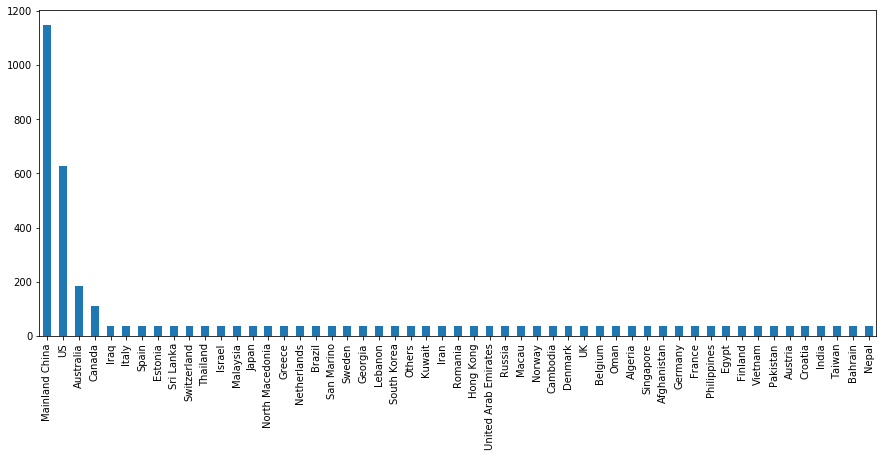

In [28]:
df['Country_Region'].value_counts().plot(kind='bar', figsize=(15,6))
plt.show()

**Check how many countries are affected and then count them**

In [29]:
df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [30]:
len(df['Country_Region'].unique())


53

**Viewing Percentages per country**

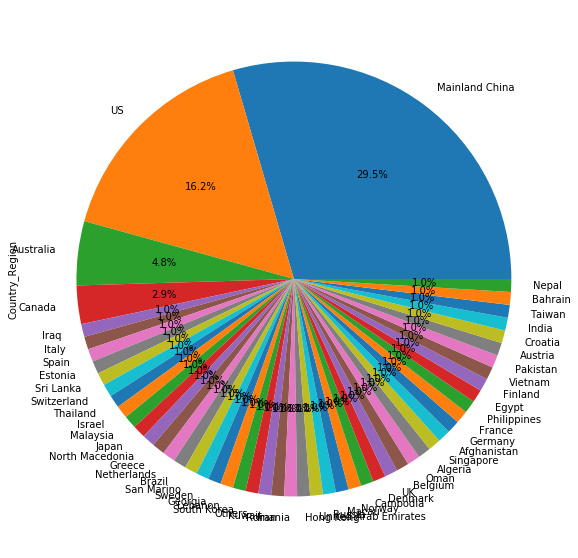

In [31]:
plt.figure(figsize=(15,10))
df['Country_Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

**Checking the Distributions on the Map using GeoPandas**

In [32]:
dir(gpd) # All the functions GeoPandas has

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [0]:
# First Convert Pandas DataFrame into GeoPandas DataFrame
gdf01 = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['Long'], df['Lat'] ) )
# Method-1: to get x,y points 

In [34]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
# Method-2 : to get x,y points
# points = [ Point(x,y) for x,y in zip( df['Long'], df['Lat'] ) ]

In [0]:
# gdp02 = gpd.GeoDataFrame(df, geometry = points)
# gdp02.head()

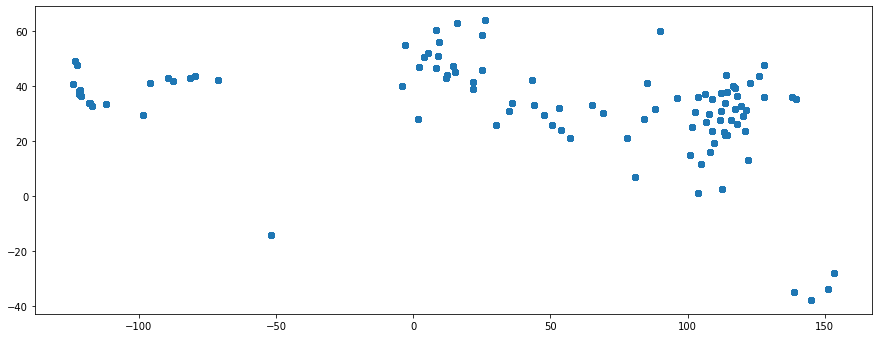

In [37]:
gdf01.plot( figsize=(15, 6) )
plt.show()

(-197.99999999999997, 198.00000000000006, -98.68225649999998, 92.3273865)

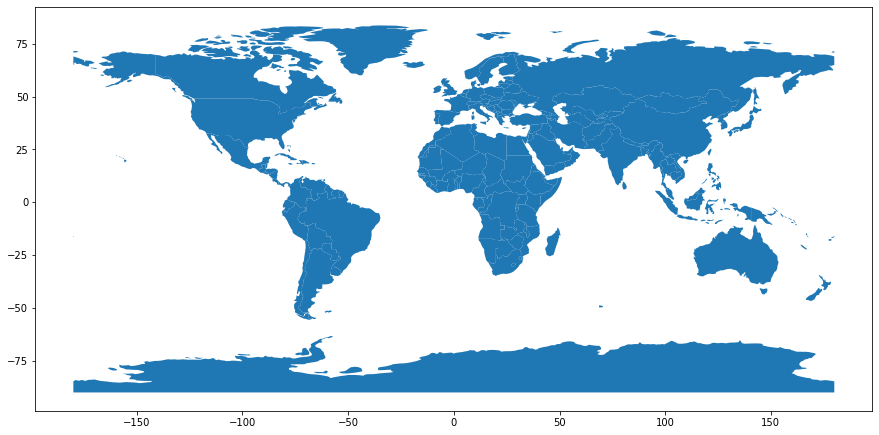

In [38]:
# Importing the world Map
world = gpd.read_file( gpd.datasets.get_path('naturalearth_lowres') )
ax = world.plot( figsize=(15, 13) )
ax.axis('on')

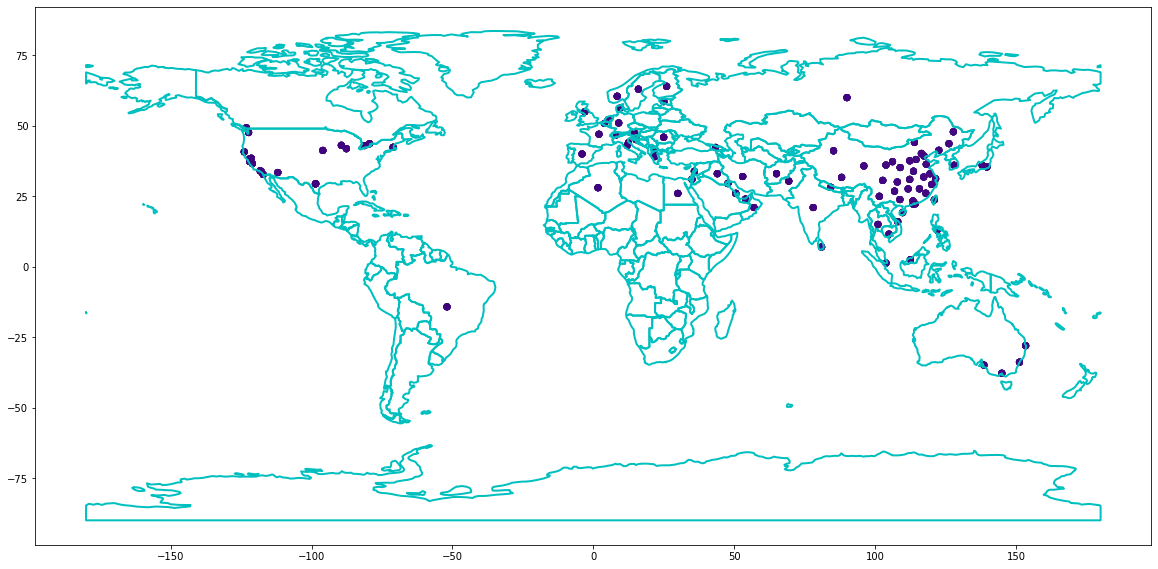

In [39]:
# Overlapping the two maps.
fig, ax = plt.subplots( figsize=(20, 10) )
gdf01.plot(cmap = 'Purples', ax = ax)
world.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax) #here edgecolor = 'k' in the tutorial
plt.show()

**Now Plotting Per Country**

In [40]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [42]:
# get cordinates only continent 'asia'
asia = world[ world['continent'] == 'Asia' ]
asia.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [0]:
# get cordinates only by continent 

africa = world[ world['continent'] == 'Africa' ]
north_america = world[ world['continent'] == 'North America' ]
europe = world[ world['continent'] == 'Europe' ]
# africa.head(10)

In [48]:
gdf01[gdf01['Country_Region'] == 'Mainland China' ]

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
3806,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


In [0]:
# By using the method just enter the continent_name and the country_name and it will display the graph accordingly

def enter_continent_country_name(continent_name, country_name):
  fig, ax = plt.subplots( figsize = (20, 10) )
  gdf01[gdf01['Country_Region'] == country_name ].plot(cmap = 'Purples', ax = ax, label = country_name)
  
  if(continent_name == 'asia'):
    asia.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax)
  elif(continent_name == 'africa'):
    africa.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax)
  elif(continent_name == 'europe'):
    europe.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax)
  else:
    north_america.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax)

  plt.legend()
  plt.show()
  return

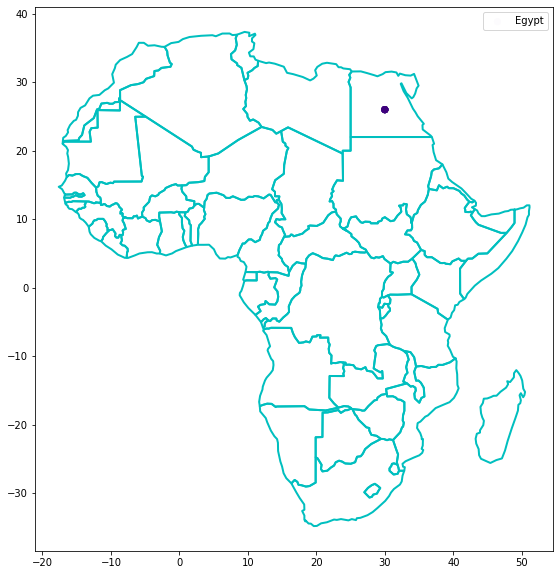

In [75]:
enter_continent_country_name('africa', 'Egypt')

In [0]:
# fig, ax = plt.subplots( figsize = (20, 10) )
# gdf01[gdf01['Country_Region'] == 'Mainland China' ].plot(cmap = 'Purples', ax = ax, label = 'Mainland China')
# asia.geometry.boundary.plot(color = None, edgecolor = 'c', linewidth = 2, ax = ax)
# plt.legend()
# plt.show()


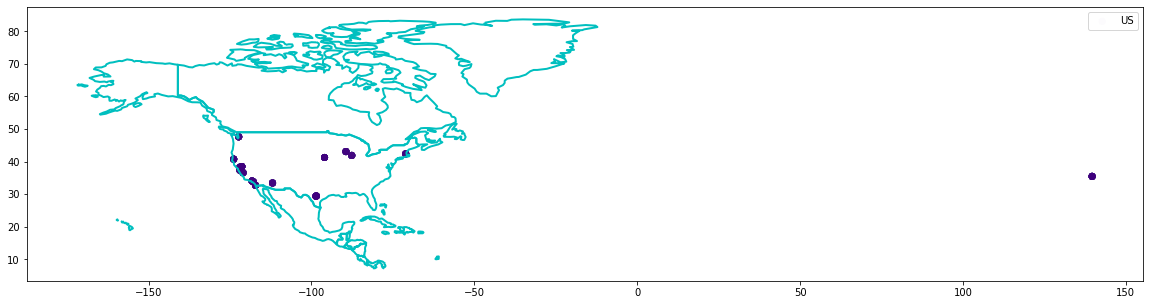

In [77]:
enter_continent_country_name('northamerica', 'US')

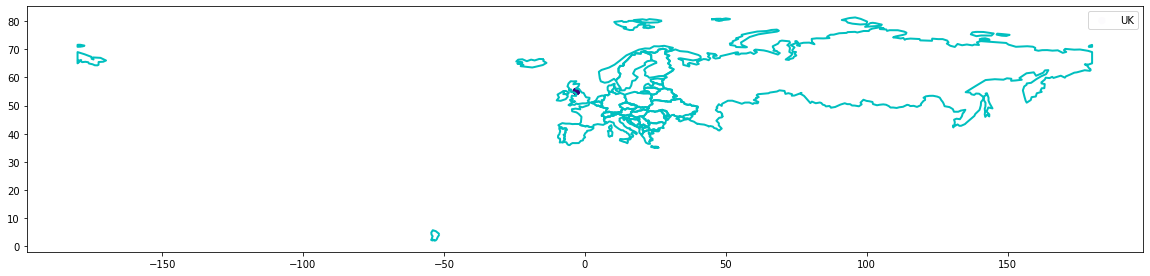

In [78]:
enter_continent_country_name('europe', 'UK')

**Time Series**

In [79]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
# Copy
df2 = df

In [0]:
df.to_csv('data/coronavirus_clean_data.csv')

In [83]:
df2['Cases_date'] = pd.to_datetime( df2['Date'] )
df2.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
Cases_date        datetime64[ns]
dtype: object

**Now plotting data according to our 'Cases_date' column**

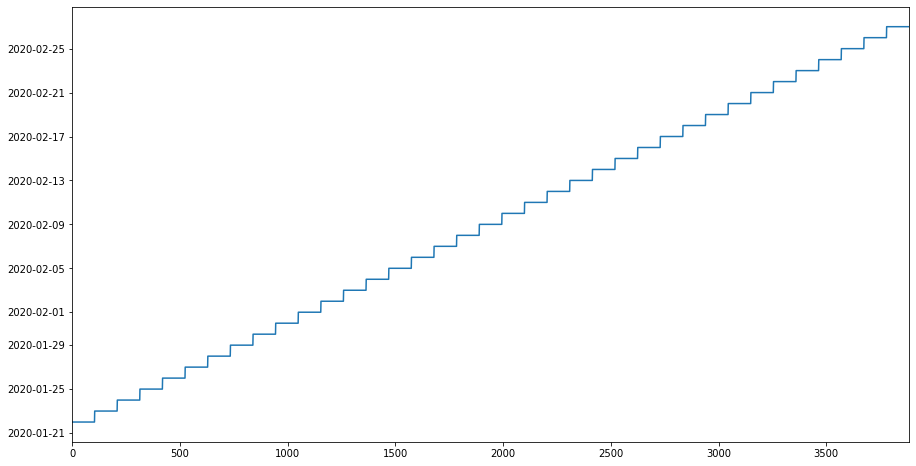

In [84]:
df2['Cases_date'].plot( figsize = (15, 8) )

So the number of cases keep increasing with time

**Now we will change the index of our dataFrame to 'Cases_date' to become a time series**

In [85]:
ts = df2.set_index('Cases_date')
ts.head(10)

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
Cases_date,,,,,,,,,
2020-01-22,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
2020-01-22,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0,POINT (113.42440 23.34170)
2020-01-22,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0,POINT (108.78810 23.82980)
2020-01-22,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0,POINT (106.87480 26.81540)
2020-01-22,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0,POINT (109.74530 19.19590)


In [87]:
# get the data of the month January

ts.loc['2020-01']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
Cases_date,,,,,,,,,
2020-01-22,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-01-31,NaN,Romania,45.9432,24.9668,1/31/20,0,0,0,POINT (24.96680 45.94320)
2020-01-31,NaN,Denmark,56.2639,9.5018,1/31/20,0,0,0,POINT (9.50180 56.26390)
2020-01-31,NaN,Estonia,58.5953,25.0136,1/31/20,0,0,0,POINT (25.01360 58.59530)


In [88]:
# check for a day of month of Fabruary

ts.loc['2020-02-24' : '2020-02-25']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
Cases_date,,,,,,,,,
2020-02-24,Anhui,Mainland China,31.8257,117.2264,2/24/20,989,6,663,POINT (117.22640 31.82570)
2020-02-24,Beijing,Mainland China,40.1824,116.4142,2/24/20,399,4,198,POINT (116.41420 40.18240)
2020-02-24,Chongqing,Mainland China,30.0572,107.8740,2/24/20,576,6,349,POINT (107.87400 30.05720)
2020-02-24,Fujian,Mainland China,26.0789,117.9874,2/24/20,293,1,183,POINT (117.98740 26.07890)
2020-02-24,Gansu,Mainland China,36.0611,103.8343,2/24/20,91,2,80,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-02-25,NaN,Romania,45.9432,24.9668,2/25/20,0,0,0,POINT (24.96680 45.94320)
2020-02-25,NaN,Denmark,56.2639,9.5018,2/25/20,0,0,0,POINT (9.50180 56.26390)
2020-02-25,NaN,Estonia,58.5953,25.0136,2/25/20,0,0,0,POINT (25.01360 58.59530)


In [90]:
ts.loc['2020-02-24' : '2020-02-25'][ ['Confirmed', 'Deaths'] ]

,Confirmed,Deaths
Cases_date,,
2020-02-24,989,6
2020-02-24,399,4
2020-02-24,576,6
2020-02-24,293,1
2020-02-24,91,2
...,...,...
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0


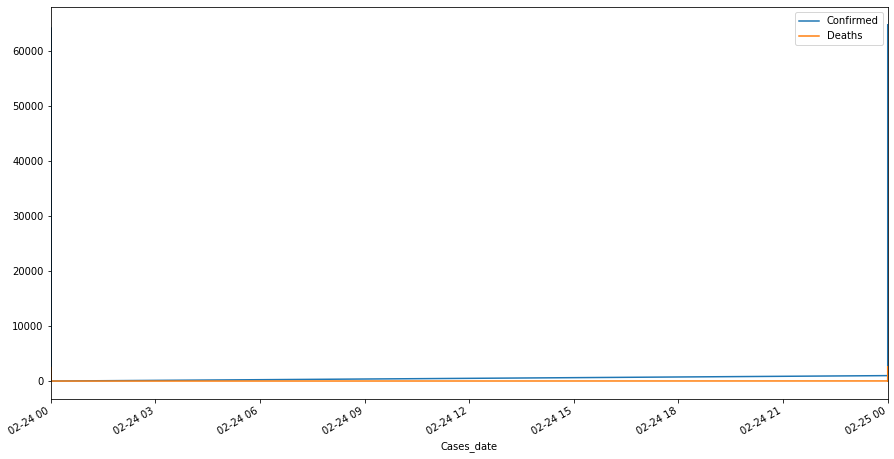

In [93]:
# Make a plot for this

ts.loc['2020-02-24' : '2020-02-25'][ ['Confirmed', 'Deaths'] ].plot(figsize = (15, 8))

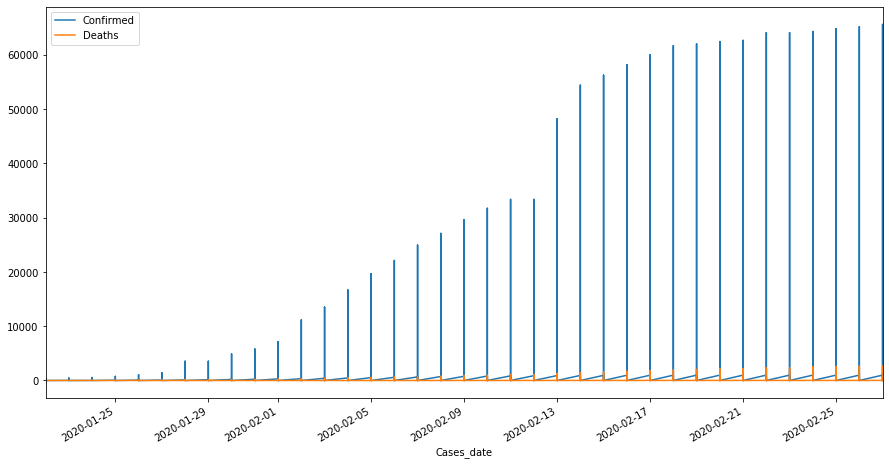

In [95]:
ts[ ['Confirmed', 'Deaths'] ].plot(figsize = (15, 8))

Here we can see clearly that with time the number of Confirmed and Deaths increases greatly.

In [100]:
ts.loc['2020-02-25']['Confirmed'].sum()

80415

In [104]:
df_by_date = ts.groupby('Cases_date').sum().reset_index(drop = None)
df_by_date

,Cases_date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,3386.46002,4806.4548,555,17,28
1,2020-01-23,3386.46002,4806.4548,653,18,30
2,2020-01-24,3386.46002,4806.4548,941,26,36
3,2020-01-25,3386.46002,4806.4548,1434,42,39
4,2020-01-26,3386.46002,4806.4548,2118,56,52
5,2020-01-27,3386.46002,4806.4548,2927,82,61
6,2020-01-28,3386.46002,4806.4548,5578,131,107
7,2020-01-29,3386.46002,4806.4548,6166,133,126
8,2020-01-30,3386.46002,4806.4548,8234,171,143
9,2020-01-31,3386.46002,4806.4548,9927,213,222


In [105]:
  df_by_date.columns

Index(['Cases_date', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

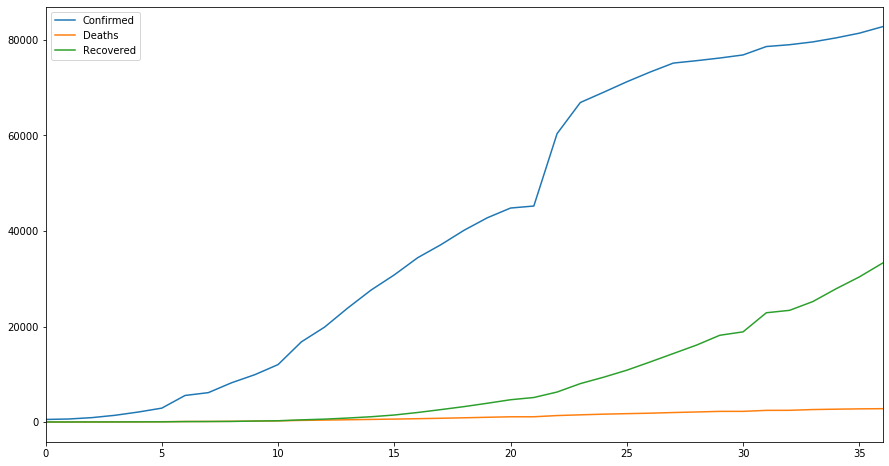

In [106]:
df_by_date[ ['Confirmed', 'Deaths', 'Recovered'] ].plot(kind = 'line', figsize = (15, 8))